/tmp/ipython-input-3205319041.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data['FEV1'][i] = np.random.normal(38, 11, 1)
/tmp/ipython-input-3205319041.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data['FEV1'][i] = np.random.normal(77, 13, 1)
/tmp/ipython-input-3205319041.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data['FEV1'][i] = np.random.normal(58, 15, 1)


Missing Values:
 Age         0
Sex         0
BMI         0
Smoking     0
Severity    0
FEV1        0
dtype: int64

Dataset saved as 'asthma_data.csv'

=== One-Sample T-Test (FEV1 vs. 80%) ===
Sample Mean FEV1: 61.81 (SD: 19.41, n=300)
t-statistic: -16.24, p-value: 5.98e-43
Decision: Reject H0

=== Two-Sample T-Test (FEV1: Male vs. Female) ===
Male Mean FEV1: 62.47 (SD: 19.75, n=141)
Female Mean FEV1: 61.22 (SD: 19.14, n=159)
t-statistic: 0.55, p-value: 0.580
Fail to reject H0

=== One-Way ANOVA (FEV1 by Severity) ===
Group Means: Mild=76.52, Moderate=59.90, Severe=38.42
F-statistic: 155.09, p-value: 7.62e-47
Decision: Reject H0

=== Tukey HSD Post-Hoc Test ===
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
    Mild Moderate -16.6149   0.0 -20.7652 -12.4647   True
    Mild   Severe -38.0973   0.0  -43.229 -32.9656   True
Moderate   Severe -21.4823   0.0 -26.5009

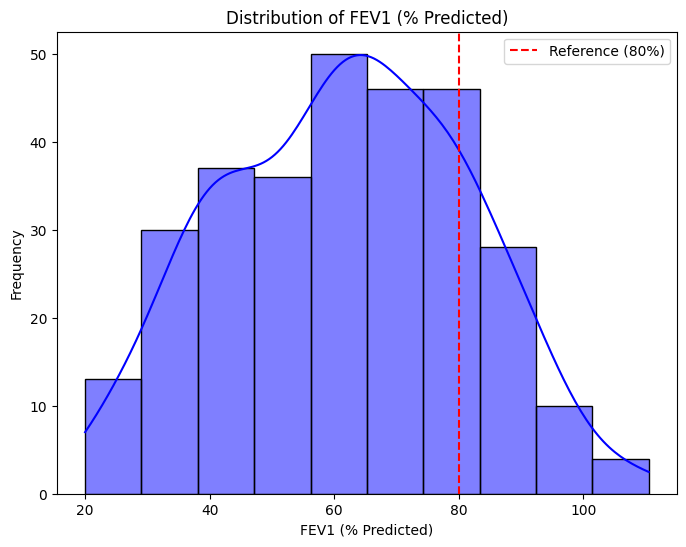

/tmp/ipython-input-3205319041.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='FEV1', data=df, order=['Mild', 'Moderate', 'Severe'], palette='Set2')


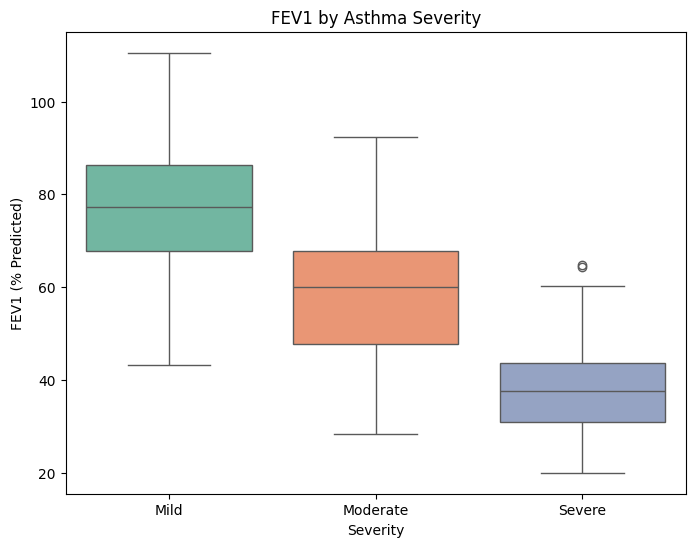

/tmp/ipython-input-3205319041.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='FEV1', data=df, palette='Set1')


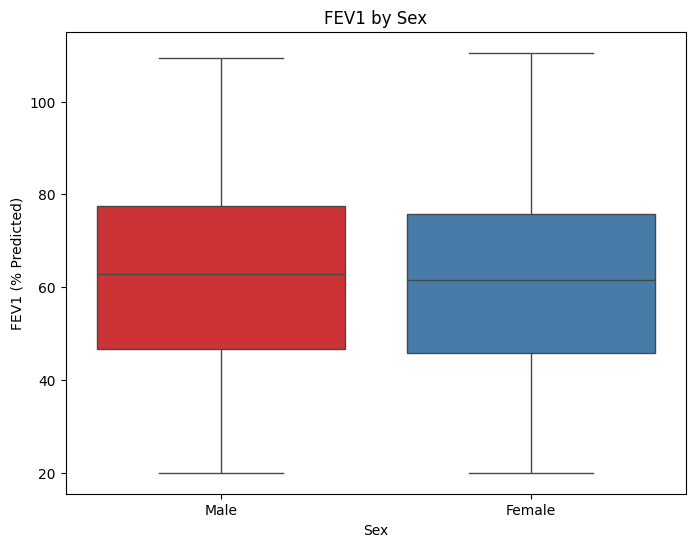


Excel file saved as 'YourName_CaseStudy.xlsx' with Data, Results, and README sheets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


All files downloaded: asthma_data.csv, YourName_CaseStudy.xlsx, and PNG visualizations


In [5]:
# Install required packages (if not already installed in Colab)
!pip install pandas numpy scipy statsmodels matplotlib seaborn openpyxl

# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate Synthetic Asthma Dataset (n=300, unique for case study)
n = 300
data = {
    'Age': np.random.randint(18, 81, n),
    'Sex': np.random.choice(['Male', 'Female'], n, p=[0.5067, 0.4933]),
    'BMI': np.round(np.random.normal(27, 5, n), 2),
    'Smoking': np.random.choice(['Smoker', 'Non-Smoker'], n, p=[0.3067, 0.6933]),
    'Severity': np.random.choice(['Mild', 'Moderate', 'Severe'], n, p=[0.3833, 0.42, 0.1967]),
    'FEV1': np.zeros(n)
}

# Generate FEV1 based on severity to mimic realistic distributions
for i, sev in enumerate(data['Severity']):
    if sev == 'Mild':
        data['FEV1'][i] = np.random.normal(77, 13, 1)
    elif sev == 'Moderate':
        data['FEV1'][i] = np.random.normal(58, 15, 1)
    else:  # Severe
        data['FEV1'][i] = np.random.normal(38, 11, 1)

# Create DataFrame
df = pd.DataFrame(data)

# Data Cleaning: Clip FEV1 and BMI to realistic ranges, ensure no negatives
df['FEV1'] = df['FEV1'].clip(lower=20, upper=120)
df['BMI'] = df['BMI'].clip(lower=15, upper=50)

# Verify no missing values
print("Missing Values:\n", df.isnull().sum())

# Save dataset to CSV for Excel/SPSS import
df.to_csv('asthma_data.csv', index=False)
print("\nDataset saved as 'asthma_data.csv'")

# 2. One-Sample T-Test (FEV1 vs. reference 80%)
print("\n=== One-Sample T-Test (FEV1 vs. 80%) ===")
t_stat_one, p_value_one = stats.ttest_1samp(df['FEV1'], 80)
mean_fev1 = df['FEV1'].mean()
sd_fev1 = df['FEV1'].std()
print(f"Sample Mean FEV1: {mean_fev1:.2f} (SD: {sd_fev1:.2f}, n={len(df)})")
print(f"t-statistic: {t_stat_one:.2f}, p-value: {p_value_one:.2e}")
print("Decision: Reject H0" if p_value_one < 0.05 else "Fail to reject H0")

# 3. Two-Sample T-Test (FEV1: Male vs. Female) [VIVA DEMO SECTION]
print("\n=== Two-Sample T-Test (FEV1: Male vs. Female) ===")
male_fev = df[df['Sex'] == 'Male']['FEV1']
female_fev = df[df['Sex'] == 'Female']['FEV1']
t_stat_two, p_value_two = stats.ttest_ind(male_fev, female_fev, equal_var=False)  # Welch's test
print(f"Male Mean FEV1: {male_fev.mean():.2f} (SD: {male_fev.std():.2f}, n={len(male_fev)})")
print(f"Female Mean FEV1: {female_fev.mean():.2f} (SD: {female_fev.std():.2f}, n={len(female_fev)})")
print(f"t-statistic: {t_stat_two:.2f}, p-value: {p_value_two:.3f}")
print("Decision: Reject H0" if p_value_two < 0.05 else "Fail to reject H0")

# 4. One-Way ANOVA (FEV1 across Severity groups)
print("\n=== One-Way ANOVA (FEV1 by Severity) ===")
mild = df[df['Severity'] == 'Mild']['FEV1']
moderate = df[df['Severity'] == 'Moderate']['FEV1']
severe = df[df['Severity'] == 'Severe']['FEV1']
f_stat, p_value_anova = stats.f_oneway(mild, moderate, severe)
print(f"Group Means: Mild={mild.mean():.2f}, Moderate={moderate.mean():.2f}, Severe={severe.mean():.2f}")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value_anova:.2e}")
print("Decision: Reject H0" if p_value_anova < 0.05 else "Fail to reject H0")

# Post-Hoc Test (Tukey HSD)
print("\n=== Tukey HSD Post-Hoc Test ===")
tukey = pairwise_tukeyhsd(df['FEV1'], df['Severity'], alpha=0.05)
print(tukey)

# 5. Visualizations
# Histogram for FEV1 distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['FEV1'], kde=True, color='blue')
plt.axvline(80, color='red', linestyle='--', label='Reference (80%)')
plt.title('Distribution of FEV1 (% Predicted)')
plt.xlabel('FEV1 (% Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('fev1_histogram.png')
plt.show()

# Boxplot for FEV1 by Severity
plt.figure(figsize=(8, 6))
sns.boxplot(x='Severity', y='FEV1', data=df, order=['Mild', 'Moderate', 'Severe'], palette='Set2')
plt.title('FEV1 by Asthma Severity')
plt.xlabel('Severity')
plt.ylabel('FEV1 (% Predicted)')
plt.savefig('fev1_boxplot_severity.png')
plt.show()

# Boxplot for FEV1 by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='FEV1', data=df, palette='Set1')
plt.title('FEV1 by Sex')
plt.xlabel('Sex')
plt.ylabel('FEV1 (% Predicted)')
plt.savefig('fev1_boxplot_sex.png')
plt.show()

# 6. Export Results to Excel for Submission
results = {
    'Test': ['One-Sample T-Test', 'Two-Sample T-Test (Male)', 'Two-Sample T-Test (Female)', 'ANOVA'],
    'Statistic': [f't={t_stat_one:.2f}', f't={t_stat_two:.2f}', f't={t_stat_two:.2f}', f'F={f_stat:.2f}'],
    'p-value': [f'{p_value_one:.2e}', f'{p_value_two:.3f}', f'{p_value_two:.3f}', f'{p_value_anova:.2e}'],
    'Mean': [f'{mean_fev1:.2f}', f'{male_fev.mean():.2f}', f'{female_fev.mean():.2f}', 'N/A'],
    'SD': [f'{sd_fev1:.2f}', f'{male_fev.std():.2f}', f'{female_fev.std():.2f}', 'N/A'],
    'Decision': ['Reject H0' if p_value_one < 0.05 else 'Fail to reject H0',
                 'Reject H0' if p_value_two < 0.05 else 'Fail to reject H0',
                 'Reject H0' if p_value_two < 0.05 else 'Fail to reject H0',
                 'Reject H0' if p_value_anova < 0.05 else 'Fail to reject H0']
}
results_df = pd.DataFrame(results)

# README sheet for variable descriptions
readme = pd.DataFrame({
    'Variable': ['Age', 'Sex', 'BMI', 'Smoking', 'Severity', 'FEV1'],
    'Type': ['Continuous (int)', 'Categorical', 'Continuous', 'Categorical', 'Categorical', 'Continuous'],
    'Description': ['Patient age in years', 'Gender', 'Body Mass Index', 'Smoking status', 'Asthma severity', 'FEV1 % predicted (lung function)'],
    'Range/Levels': ['18-80', 'Male, Female', '15-50', 'Smoker, Non-Smoker', 'Mild, Moderate, Severe', '20-120']
})

# Save to Excel with multiple sheets
with pd.ExcelWriter('YourName_CaseStudy.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Data', index=False)
    results_df.to_excel(writer, sheet_name='Results', index=False)
    readme.to_excel(writer, sheet_name='README', index=False)
print("\nExcel file saved as 'YourName_CaseStudy.xlsx' with Data, Results, and README sheets")

# Download files for submission
files.download('asthma_data.csv')
files.download('YourName_CaseStudy.xlsx')
files.download('fev1_histogram.png')
files.download('fev1_boxplot_severity.png')
files.download('fev1_boxplot_sex.png')
print("\nAll files downloaded: asthma_data.csv, YourName_CaseStudy.xlsx, and PNG visualizations")
